# Логистическая регрессия

Логистическая регрессия — это метод построения линейных классификаторов. Вот несмотря на название — регрессия, все же это метод для решения задач классификации, а почему "регрессия", мы сейчас поймем. 

## Задача обучения линейного классификатора

Обучающая выборка: $X^l = (x_i, y_i)_{i=1}^{l},\ x_i \in \mathbb{R}^n,\ y_i \in \{-1, +1\}.$

- Линейная модель классификации:

$$a(x, w) = \mathrm{sign}\left\langle x, w\right\rangle.$$

Вектор весов — это направляющий вектор разделяющей гиперплоскости. Если скалярное произведение положительное, то объект относится к классу (+1), если отрицательное, то к классу (−1).

- Непрерывная аппроксимация бинарной функции потерь:

$$Q(w) = \sum\limits_{i=1}^{l}\Big[a(x_i, w) < 0\Big] \leq \sum\limits_{i=1}^{l}\mathscr{L}\Big(\left\langle x_i, w\right\rangle y_i \Big) \rightarrow \min_w.$$
 
Если мы в качестве потери рассматриваем бинарную величину (есть ошибка или нет ошибки), то мы просто имеем число ошибок классификатора на обучающей выборке. Если же мы используем непрерывную функцию потерь, которая мажорирует сверху бинарную функцию потерь, то мы получаем функционал, который гораздо удобнее минимизировать, потому что он является непрерывным или даже гладким. Но поскольку он мажорирует сверху, то, минимизируя этот функционал, мы также будем минимизировать и исходное число ошибок. 

Отступ (margin) объекта $x_i: M_i(w) = \left\langle x_i, w\right\rangle y_i$.

При этом у нас возникает очень важное понятие — отступ объекта. Это скалярное произведение, умноженное на правильный ответ. Поэтому если у нас на объекте есть ошибка — отступ отрицательный, если нет ошибки — отступ положительный. 

И функция потерь $\mathscr{L}$, если она монотонно убывает, то она штрафует нас за ошибки и даже штрафует за приближение к границе между классами. Мы с вами будем рассматривать конкретную функцию потерь, которая называется логарифмической, и ее вид показан на рисунке. Замечу, что она очень похожа на ту функцию потерь, которую мы использовали в методе опорных векторов, но там функция потерь была кусочно-линейной, а здесь она гладкая.

- Логарифмическая функция потерь, как функция отступа $M$:

$$\mathscr{L}(M) = \log(1+e^{-M}).$$

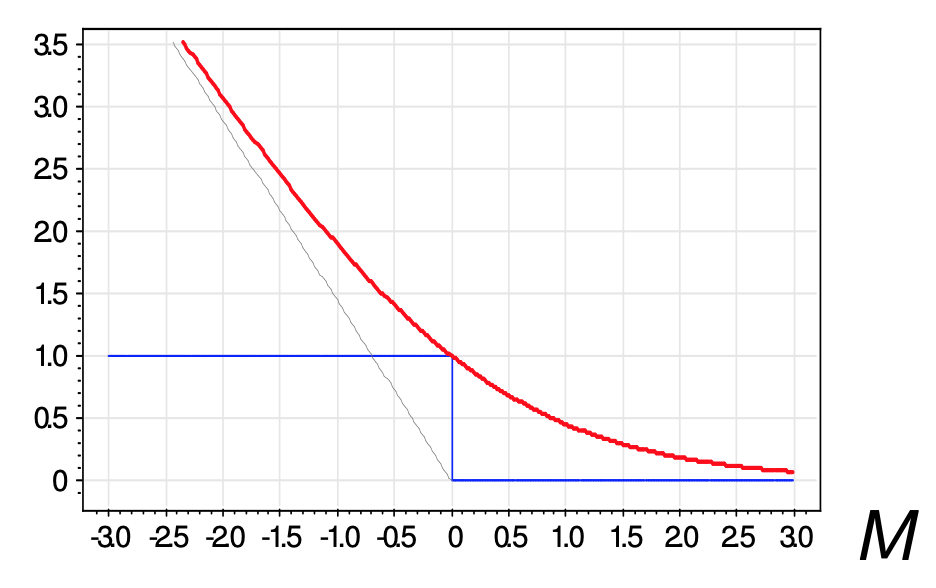

In [1]:
from IPython.display import Image
Image(filename='images/3.2 Логистическая регрессия/log_regr_1.png')

## Обоснование логарифмической функции потерь

В чем преимущество использования именно такой функции потерь? Оказывается, что она приобретает очень интересный вероятностный смысл, если мы предположим, что у нас имеется вероятностная модель порождения данных. 

А именно: будем предполагать, что наша выборка является выборкой независимых наблюдений из одного и того же параметрического семейства распределений. Это совместная плотность распределений иксов и игреков с каким-то параметром $w$. 

$(x_i, y_i)_{i=1}^{l} \sim p(x, y; w)$ - выборка независимых наблюдений.

Поскольку выборка независимая, то принцип максимума правдоподобия:

$$L(w) = \log\prod\limits_{i=1}^{l}p(x_i, y_i;w) = \sum\limits_{i=1}^{l}\log P(y_i | x_i; w)p(x_i) \rightarrow \max_w.$$

- В чем заключается принцип максимума правдоподобия (неформально)?
 - В нахождении параметров, при которых появление данной выборки наиболее вероятно.
 
Так вот оказывается, что если мы вполне определенный вид этой апостериорной вероятности предположим, то принцип максимума правдоподобия даст ровно тот же функционал, который мы ввели выше из чисто эвристических соображений. А именно: оказывается, что апостериорная вероятность класса $y_i$-тое для объекта $x_i$-тое задается функцией, которая называется сигмоидной функцией — функция от отступа. 
 
Вероятностная модель порождения данных с параметром $w$:

- $p(x)$ не зависит от параметра модели $w$,

- $P(y | x; w)$ (условная или, говорят, апостериорная вероятность класса для данного объекта x) описывается линейной моделью классификации:

$$P(y_i | x_i; w) = \frac{1}{1 + \exp{(-\left\langle x_i, w\right\rangle y_i)}} = \sigma \Big(\left\langle x_i, w\right\rangle y_i\Big),$$

где $\sigma(M) = \frac{1}{1 + e^{-M}}$ - сигмоидная функция.

И получается, что функционал, который мы ввели выше, — это минимум аппроксимированного эмпирического риска, и функционал правдоподобия — максимум логарифма правдоподобия, они при этом оказываются эквивалентны. И оказывается, что если мы будем оптимизировать такой функционал, то мы заодно сможем оценить и апостериорную вероятность класса для каждого объекта, который мы будем классифицировать. 

Тогда задачи $Q(w) \rightarrow \min$ и $L(w) \rightarrow \max$ эквивалентны:

$$Q(w) = \sum\limits_{i=1}^{l}\log{\big(1 + \exp{(-\left\langle w, x_i\right\rangle y_i)}\big)} \rightarrow \min_w.$$

И в этом есть основное отличие логистической регрессии от других методов линейной классификации. Она позволяет оценивать вероятности классов.

## Оптимизация параметров логистической регрессии

Метод первого порядка - стохастический градиент:

$$w^{(t+1)} := w^{(t)} + \eta_t y_i x_i (1 - \sigma_i),$$

 - $\eta_t$ - градиентный шаг,

 - $\sigma_i = \sigma(\left\langle x_i, w\right\rangle y_i) = P(y_i | x_i)$ - вероятность правильной классификации $x_i$.
 
Метод второго порядка (Ньютона-Рафсона) приводит к IRLS, Iteratively Reweighted Least Squares:

$$w^{(t+1)} := w^{(t)} + \eta_t (F^{T}\Lambda F)^{-1}F^{T}\tilde{y},$$

 - $F$ - матрица объекты-признаки $l\times n$,
 - $\tilde{y} = \big(y_i(1 - \sigma_i)\big)$ = модифицированный вектор ответов,
 - $\Lambda = \mathrm{diag}\big((1-\sigma_i)/\sigma_i\big)$ - диагональная матрица.
 
Очень известный метод, который чаще всего и используется на практике для построения логистической регрессии, — это итеративно перевзвешиваемый метод наименьших квадратов. По сути, на каждой итерации этого метода решается линейная регрессионная задача, и это еще один повод называть данный метод регрессией, несмотря на то, что все-таки решается задача классификации.

# Пример применения логистической регрессии

## Пример. Бинаризация признаков и скоринговая карта

Задача кредитного скоринга:

- $x_i$ - заемщики

- $y_i \in \{-1, +1\}

Бинаризация признаков $f_j(x)$:

- $b_{jk}(x) = [f_j(x) \in D_{jk}]$

## Пример. Оценивание рисков в кредитном скоринге

Важной особенностью логистической регрессии является возможность оценивать апостериорную вероятность класса, и в задаче кредитного скоринга это оказывается очень важной особенностью. Это позволяет нам оценивать риски, как на отдельном заемщике $x$, так и на всем кредитном портфеле банка, то есть на выборке заемщиков.

Оценка _риска_ (математического ожидания) потерь объекта $x$:

$$R(x) = \sum\limits_{y\in Y} D_{xy} P(y|x) = \sum\limits_{y\in Y} D_{xy}\sigma(\left\langle w, x\right\rangle y),$$

где $D_{xy}$ - величина потери для $(x, y)$.

Величина потери $D$ показывает, сколько банк потеряет, если на данном объекте $x$ реализуется класс $y$. То есть если заемщик отдаст кредит, он хороший, good, то значит эта величина потери отрицательная, банк оказывается с прибылью. Если заемщик плохой, bad, $−1$, то банк потеряет сумму, которую он выдал. И здесь величина потери должна быть положительной. То есть $D(x,y)$ — это величина, которая банку известна, а $P(y|x)$ — это величина, которую мы получаем из скоринговой модели с помощью логистической регрессии.

Но беда в том, что знать среднюю потерю, даже если она усреднится по всему кредитному портфелю, по всем заемщикам — этого мало. Нужно знать, сколько банк сможет потерять в худшем случае.

__Методика VaR (Value at Risk)__:

Оценка функции распределения потерь:

- для каждого $x_i$ разыгрывается $N$ раз исход $y_i \sim P(y|x_i);$

- строится эмпирическое распределение потерь $V = \sum\limits_{i=1}^{l}D_{x_iy_i}$;

- $99$%-квантиль эмпирического распределения определяет величину резервируемого капитала. 

# Регуляризованная логистическая регрессия

- $L_2$-регуляризация решает проблему мультиколлинеарности (сокращает веса линейно зависимых признаков):

$$Q(w) = \sum\limits_{i=1}^{l} \log(1 + \exp{(-\left\langle w, x_i\right\rangle y_i)}) + \tau\sum\limits_{j=1}^{n}w_j^2 \rightarrow \min_w.$$

- $L_1$-регуляризация имеет эффект отбора признаков (обнуляет веса $w_j$ неинформативных признаков):

$$Q(w) = \sum\limits_{i=1}^{l} \log(1 + \exp{(-\left\langle w, x_i\right\rangle y_i)}) + \tau\sum\limits_{j=1}^{n}|w_j| \rightarrow \min_w.$$

Чем выше коэффициент регуляризации $\tau$, тем больше признаков получат нулевые веса $w_j$. А нулевой вес в линейной комбинации означает, что признак больше не используется.

- Используется также их комбинация - ElasticNet.

Она отличается тем, что не так агрессивно отбирает признаки. То есть, если есть группа признаков, которая все же информативна. Каждый признак этой группы информативен, но они линейно зависимы. И в таком случае, ElasticNet оставляет всю группу признаков, вместе им понижает веса, но не оставляет, например, только один из этих признаков.

Коэффициент регуляризации $\tau$ подбирается по скользящему контролю.

- Есть ли особенность в обучении регуляризованной логистической регресии по сравнению с обычной?

Может возникнуть сложность в случае L1-регуляризации, так как модуль является кусочно-непрерывной функцией с неопределенной производной в нуле, поэтому напрямую воспользоваться градиентными методами невозможно.

## Резюме

- _Логистическая регрессия_ - это линейный классификатор, оценивающий апостериорные вероятности классов $P(y|x)$, необходимые в прикладных задачах оценивания рисков.

Поскольку, вероятность — это вещественная величина, отсюда и происходит название регрессия. То есть, мы не только принимаем решение, даем класс, но и даем вероятность класса.

- Регуляризация улучшает обобщающую способность логистической регрессии:

 - $L_2$-регуляризация - при мультиколлинеарности признаков;
 - $L_1$-регуляризация - для отбора признаков;
 - ElasticNet - для менее агрессивного отбора признаков.
 
- В чем разница между SVM и логистической регрессией с L2-регуляризацией?

 - Это одно и то же: в SVM для этого используется кусочно-линейная функция, а для логистической регрессии — логарифмическая.
 
- Настройка логистической регрессии эквивалентна максимизации правдоподобия ответов классификатора.
 - На лекции было показано, что эти две задачи действительно эквивалентны. Благодаря этому итоговый классификатор может корректно оценивать вероятности принадлежности объектов классам.


- Логистическая регрессия оценивает вероятности принадлежности объектов к классам.
 - Поскольку логистическая регрессия, по сути, максимизирует правдоподобие ответов алгоритма, она действительно позволяет оценивать данные вероятности.


- Вероятность принадлежности объекта к положительному классу оценивается как сигмоида от скалярного произведения весов на признаки.
 - Это верная формула для получения оценок вероятности.
 
 
- Регуляризация позволяет бороться с переобучением. Регуляризация штрафует алгоритм за чрезмерно высокую сложность — а именно это является симптомом переобучения.

# Логистическая регрессия

Логистическая регрессия — один из видов линейных классификаторов. Одной из ее особенностей является возможность оценивания вероятностей классов, тогда как большинство линейных классификаторов могут выдавать только номера классов.

Логистическая регрессия использует достаточно сложный функционал качества, который не допускает записи решения в явном виде (в отличие от, например, линейной регрессии). Тем не менее, логистическую регрессию можно настраивать с помощью градиентного спуска.

Мы будем работать с выборкой, содержащей два признака. Будем считать, что ответы лежат в множестве $\{-1, 1\}$. Для настройки логистической регрессии мы будем решать следующую задачу:

$$\frac{1}{l}\sum\limits_{i=1}^{l}\log\big(1 + \exp{(-y_i(w_1x_{i1} + w_2x_{i2}))}\big) + \frac{1}{2}C||w||^2 \rightarrow \min_{w_1, w_2}.$$

Здесь $x_{i1}$ и $x_{i2}$ — значение первого и второго признаков соответственно на объекте $x_i$. В этом задании мы будем рассматривать алгоритмы без свободного члена, чтобы упростить работу.

Градиентный шаг для весов будет заключаться в одновременном обновлении весов w1 и w2 по следующим формулам:

$$w_1 := w_1 + k\frac{1}{l}\sum\limits_{i=1}^{l}y_i x_{i1} \Big(1 - \frac{1}{1+\exp{(-y_i(w_1x_{i1} + w_2x_{i2}))}}\Big) - kCw_1;$$

$$w_2 := w_2 + k\frac{1}{l}\sum\limits_{i=1}^{l}y_i x_{i2} \Big(1 - \frac{1}{1+\exp{(-y_i(w_1x_{i1} + w_2x_{i2}))}}\Big) - kCw_2.$$

Здесь $k$ — размер шага.

Линейные методы могут переобучаться и давать плохое качество из-за различных проблем в данных: мультиколлинеарности, зашумленности и т.д. Чтобы избежать этого, следует использовать регуляризацию — она позволяет понизить сложность модели и не допустить переобучения. Сила регуляризации определяется коэффициентом $C$ в формулах, указанных выше.

## Реализация в Scikit-Learn

В этом задании мы предлагаем вам самостоятельно реализовать градиентный спуск.

В качестве метрики качества будем использовать AUC-ROC (Area Under ROC-Curve). Она предназначена для алгоритмов бинарной классификации, выдающих оценку принадлежности объекта к одному из классов. По сути, значение этой метрики является агрегацией показателей качества всех алгоритмов, которые можно получить, выбирая какой-либо порог для оценки принадлежности.

В Scikit-Learn метрика AUC реализована функцией sklearn.metrics.roc_auc_score. В качестве первого аргумента ей передается вектор истинных ответов, в качестве второго — вектор с оценками принадлежности объектов к первому классу.

Полезные ссылки:

- https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture05-linclass.pdf

- https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf

### Загрузите данные из файла data-logistic.csv. Это двумерная выборка, целевая переменная на которой принимает значения -1 или 1.